In [1]:
import os
import pandas as pd

In [2]:
libs = ["ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2"]
response_dir = "/data5/deepro/starrseq/papers/results/2_categorize_fragments_on_activity/data"

In [3]:
def get_file_length(filename):
    with open(filename) as f:
        nlines = len(f.readlines())
    return nlines

In [4]:
response_dict = dict()

for lib in libs:
    r_file = os.path.join(response_dir, lib, "responsive.bed")
    dbr_file = os.path.join(response_dir, lib, "direct_binding_responsive.bed")
    idbr_file = os.path.join(response_dir, lib, "indirect_binding_responsive.bed")
    response_dict[lib] = list(map(get_file_length, [r_file, dbr_file, idbr_file]))

In [5]:
response_dict

{'ATF2': [20987, 4569, 16418],
 'CTCF': [10897, 2435, 8462],
 'FOXA1': [35245, 737, 34508],
 'LEF1': [10145, 274, 9871],
 'SCRT1': [4288, 744, 3544],
 'TCF7L2': [9365, 2181, 7184]}

In [11]:
df = pd.DataFrame(response_dict).T.rename(columns={0:"responsive", 1:"binding_responsive", 2:"not_binding_responsive"})

<AxesSubplot:>

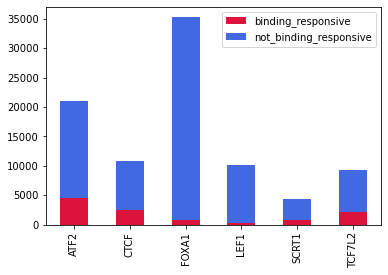

In [21]:
df.loc[:, ["binding_responsive", "not_binding_responsive"]].plot.bar(stacked=True, color=["crimson", "royalblue"])

In [16]:
info_dict

{'ATF2': (31991, 254161, 4575, 20987),
 'FOXA1': (3652, 254161, 737, 35245),
 'LEF1': (3967, 254161, 274, 10145),
 'SCRT1': (30602, 254161, 746, 4288)}

In [17]:
pd.DataFrame({"chip_in_master": percentage_master, "chip_in_response": percentage_response}, index=["ATF2", "FOXA1", "LEF1", "SCRT1"])

,chip_in_master,chip_in_response
ATF2,12.586904,21.799209
FOXA1,1.436884,2.091077
LEF1,1.560822,2.700838
SCRT1,12.040400,17.397388
